# Imports

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import numpy as np

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'lib')))
from renormalization import *

# RG flow

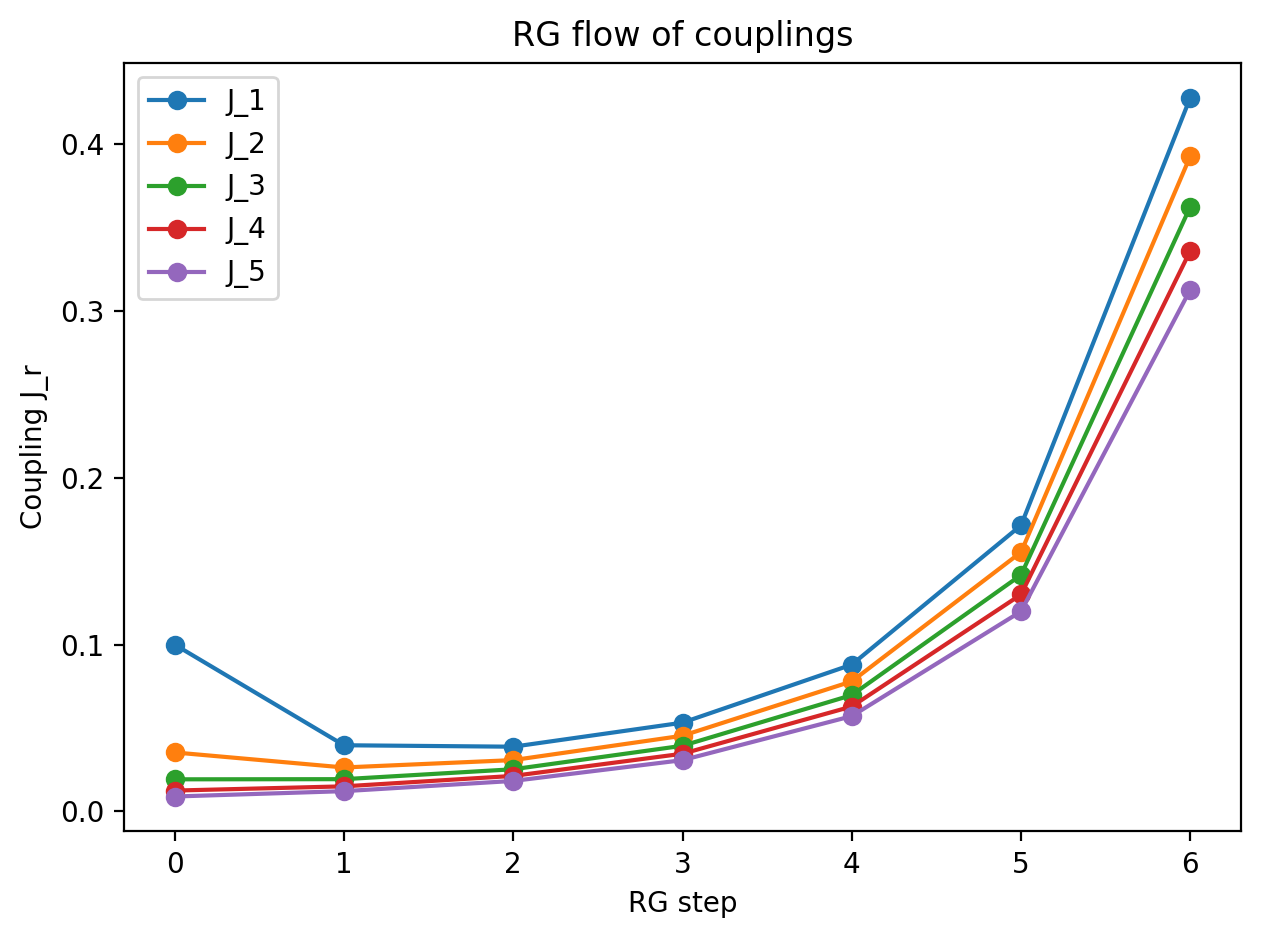


RG step 0:
 [[1.     0.8187]
 [0.8187 1.    ]]

RG step 1:
 [[1.     0.9237]
 [0.9237 1.    ]]

RG step 2:
 [[1.     0.9253]
 [0.9253 1.    ]]

RG step 3:
 [[1.    0.899]
 [0.899 1.   ]]

RG step 4:
 [[1.     0.8386]
 [0.8386 1.    ]]

RG step 5:
 [[1.     0.7095]
 [0.7095 1.    ]]

RG step 6:
 [[1.     0.4248]
 [0.4248 1.    ]]


In [7]:
J0 = .1
a = 1.5
max_dist_final = 3**2
n_steps = 6

J_list, T_list = generate_rg_flow(J0, a, max_dist_final, n_steps, trace_TM=True, TM_r=1)
flows = extract_flows(J_list, max_dist_final)
plot_rg_flow(flows, distances_to_plot=[1, 2, 3, 4, 5])

[print(f"\nRG step {i}:\n", np.round(t, 4)) for i, t in enumerate(T_list)];

# Phase determination

In [11]:
J0 = 1
a = 1.5

phase, step = find_phase(
        J0, a,
        TM_r=1,
        max_dist_final=8,
        n_steps=5,
        threshold=0.1
    )
print(f"Phase at J0={J0}, a={a}: {phase} (decided at step {step})")

Phase at J0=1, a=1.5: ferromagnetic (decided at step 1)


# Critical point

In [14]:
Jc = find_Jc(
    a=1.5,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=6,
    tol=1e-5,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical Jc =", Jc)
print("Critical Tc =", 1/Jc)

Critical Jc = 0.010002979934215547
Critical Tc = 99.97020953520706


## Critical line

a = 1.0000  →  Jc = 0.000999, Tc = 1e+03
a = 1.1111  →  Jc = 0.000999, Tc = 1e+03
a = 1.2222  →  Jc = 0.0182, Tc = 55.1
a = 1.3333  →  Jc = 0.0888, Tc = 11.3
a = 1.4444  →  Jc = 0.159, Tc = 6.3
a = 1.5556  →  Jc = 0.227, Tc = 4.4
a = 1.6667  →  Jc = 0.294, Tc = 3.4
a = 1.7778  →  Jc = 0.359, Tc = 2.78
a = 1.8889  →  Jc = 0.423, Tc = 2.36
a = 2.0000  →  Jc = 0.485, Tc = 2.06


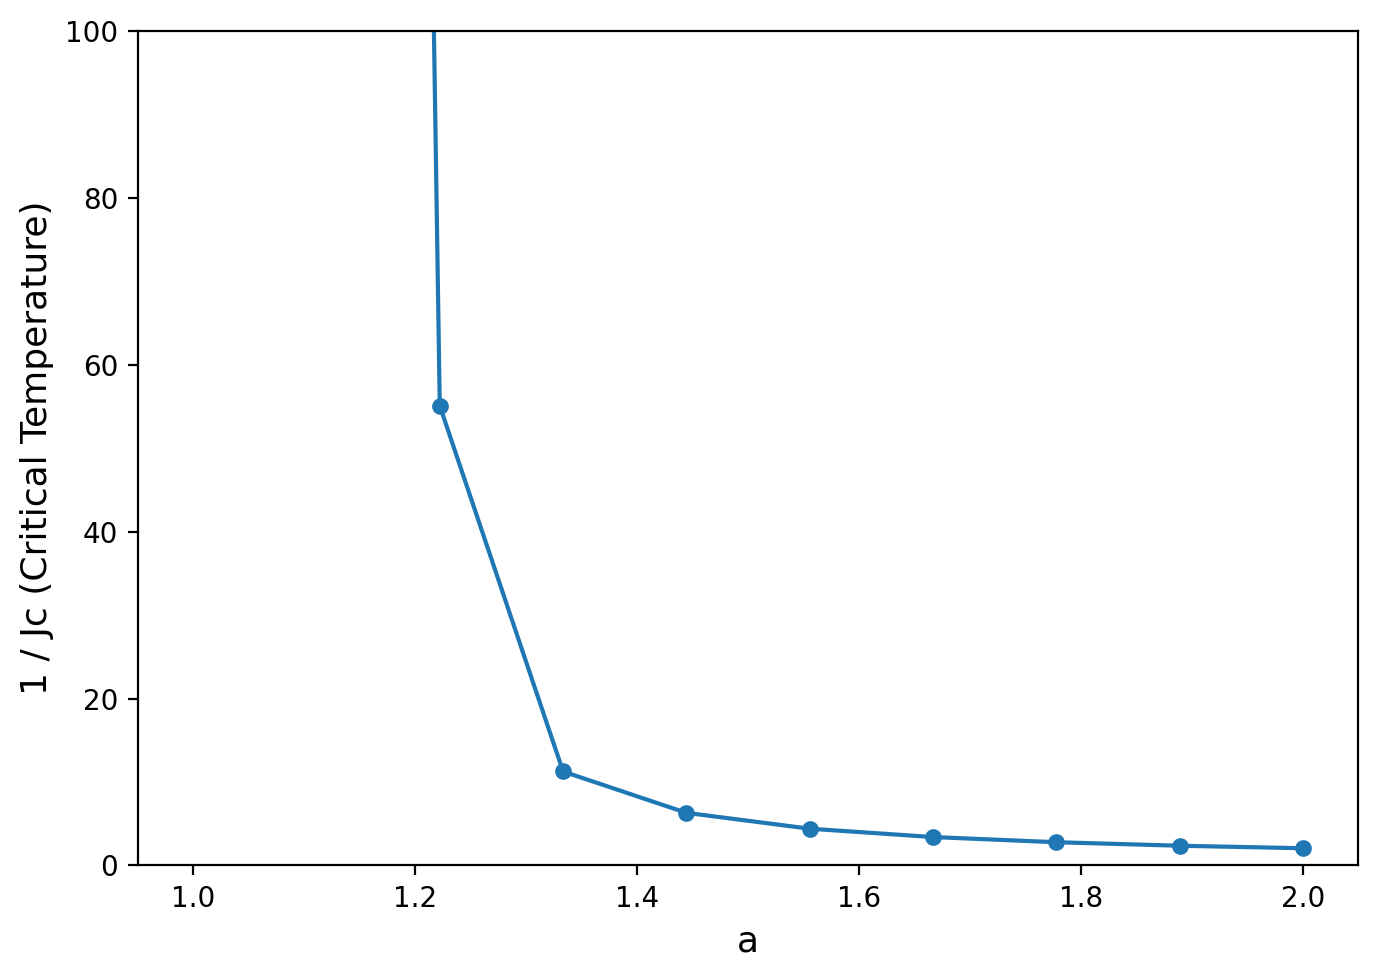

In [39]:
a_vals = np.linspace(1, 2, 10)
Jc_vals = []
Tc_vals = []

for a in a_vals:
    Jc = find_Jc(
        a=a,
        Jlow=1e-4, Jhigh=1e4,
        max_steps=8, max_dist_final=9,
        tol=1e-5,
        growth_threshold=1e3, decay_threshold=1e-3
    )
    Jc_vals.append(Jc)
    Tc_vals.append(1.0 / Jc)
    print(f"a = {a:.4f}  →  Jc = {Jc:.3}, Tc = {1/Jc:.3}")

Jc_vals = np.array(Jc_vals)
Tc_vals = np.array(Tc_vals)

# ----- plot -----
plt.figure(figsize=(7,5))
plt.plot(a_vals, Tc_vals, 'o-', ms=5)
plt.ylim(0, 100)
plt.xlabel("a", fontsize=13)
plt.ylabel("1 / Jc (Critical Temperature)", fontsize=13)
plt.grid(False)
plt.tight_layout()
plt.show()

# Fixed point

In [22]:
a = 1
tolerance = 1e-5

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=6,
    tol=tolerance,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical J =", Jc)

J0 = build_initial_guess(Jc, a=a, D=200)

J_star, info = newton_rg_lstsq(J0, verbose=True)
print("Fixed point J*:\n", J_star)

Critical J = 0.12799049526453016
[lstsq] iter 0: D=200, D1=200, ||J'-J||=2.343e-02
[lstsq] iter 1: D=200, D1=200, ||J'-J||=2.107e+04
[lstsq] iter 2: D=200, D1=200, ||J'-J||=1.483e+04
[lstsq] iter 3: D=200, D1=200, ||J'-J||=2.187e+04
[lstsq] iter 4: D=200, D1=200, ||J'-J||=1.953e+04
[lstsq] iter 5: D=200, D1=200, ||J'-J||=1.931e+04
[lstsq] iter 6: D=200, D1=200, ||J'-J||=2.030e+04
[lstsq] iter 7: D=200, D1=200, ||J'-J||=2.432e+04
[lstsq] iter 8: D=200, D1=200, ||J'-J||=2.868e+04
[lstsq] iter 9: D=200, D1=200, ||J'-J||=2.888e+04
Fixed point J*:
 [ 0.00000000e+00  2.72693493e+02  8.21727094e+02 -1.23522718e+03
  3.95323299e+03  2.61492638e+03 -3.27896170e+03 -1.54598938e+03
 -7.32761692e+02 -3.38544991e+03  2.39704429e+03  3.28881696e+03
  7.41198204e+02  7.85941511e+02 -1.73496787e+03 -1.96907407e+03
  3.36098653e+03  1.54599256e+03 -4.76367089e+03  1.22447905e+03
 -7.10643113e+02 -2.66321227e+03  1.11326758e+03 -8.44930356e+01
 -1.33979365e+03  1.69608439e+03 -1.86338465e+02 -4.68447967

In [13]:
err = check_fixed_point(J_star, tol=tolerance)

Fixed-point error norm = 4.325e+04
✘ Not a fixed point (or tolerance too strict).


# Thermal exponent yT

In [34]:
a = .98
N = 1000

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=1e-5, growth_threshold=1e4, decay_threshold=1e-4
)
J0 = build_initial_guess(Jc, a=a, D=N)
J_star, info = newton_rg_lstsq(J0, verbose=False)

T, J_head = recursion_matrix_at_fixed_point(J_star, N)
y_T, lambda_T, eigs = thermal_exponent_from_T(T, b=3.0)

print("Largest relevant eigenvalue λ_T:", lambda_T)
print("Thermal scaling exponent y_T:", y_T)
print("Correlation length exponent ν ≈ 1/y_T:", 1.0/y_T)

Largest relevant eigenvalue λ_T: (1.0442915858807107+0j)
Thermal scaling exponent y_T: 0.0394486278116333
Correlation length exponent ν ≈ 1/y_T: 25.34942418719828


In [30]:
eigvals = np.linalg.eigvals(T)
sorted(eigvals, key=lambda z: abs(z), reverse=True)

[np.complex128(0.9192612128050655+0j),
 np.complex128(0.2816243583784812+0.5832769306273999j),
 np.complex128(0.2816243583784812-0.5832769306273999j),
 np.complex128(-0.28685238540515234+0.4504715919158681j),
 np.complex128(-0.28685238540515234-0.4504715919158681j),
 np.complex128(-0.49241816019438156+0j),
 np.complex128(-0.07132686766022356+0j),
 np.complex128(-0.036776474800989715+0.05539590197778245j),
 np.complex128(-0.036776474800989715-0.05539590197778245j),
 np.complex128(0.030915640573921106+0.05300511017368809j),
 np.complex128(0.030915640573921106-0.05300511017368809j),
 np.complex128(0.05346509533244396+0j),
 np.complex128(-0.005125709040049381+0j),
 np.complex128(-5.0542586480917926e-05+4.7849369529639414e-05j),
 np.complex128(-5.0542586480917926e-05-4.7849369529639414e-05j),
 np.complex128(4.2659492944909175e-05+4.824793552894552e-05j),
 np.complex128(4.2659492944909175e-05-4.824793552894552e-05j),
 np.complex128(3.578586133550879e-05+1.973423753278621e-05j),
 np.complex12

## Stability of yT with N

In [ ]:
# ----- parameters -----
b = 3.0
N_min = 20
N_max = len(J_star) - 1    # maximum allowed head size

Ns = []
lambda_Ts = []
yTs = []

# ----- main sweep -----
for N in range(N_min, N_max + 1, 20):
    T, J_head = recursion_matrix_at_fixed_point(J_star, N)
    y_T, lambda_T, eigs = thermal_exponent_from_T(T, b)

    
    Ns.append(N)
    lambda_Ts.append(lambda_T.real)
    yTs.append(y_T.real)

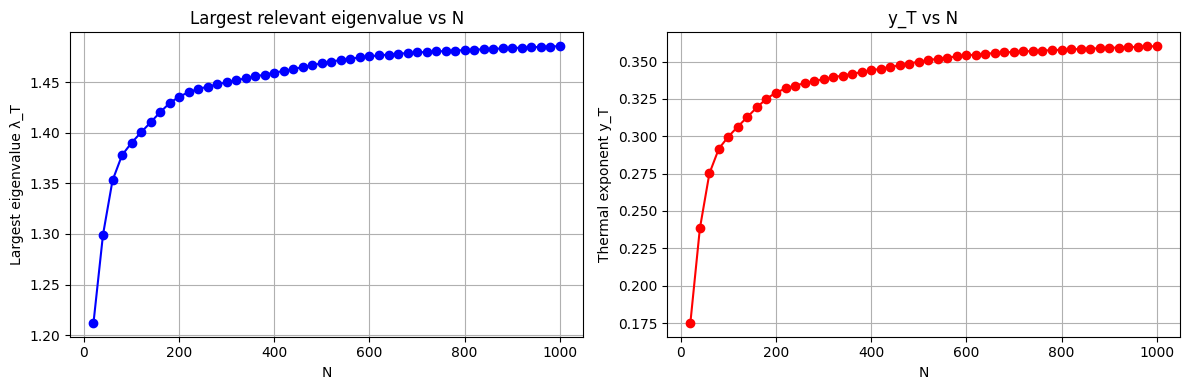

In [27]:
# ----- plots -----
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(Ns, lambda_Ts, 'b-o')
ax[0].set_xlabel("N")
ax[0].set_ylabel("Largest eigenvalue λ_T")
ax[0].set_title("Largest relevant eigenvalue vs N")
ax[0].grid()

ax[1].plot(Ns, yTs, 'r-o')
ax[1].set_xlabel("N")
ax[1].set_ylabel("Thermal exponent y_T")
ax[1].set_title("y_T vs N")
ax[1].grid()

plt.tight_layout()
plt.savefig("../figures/yT_stability.png")
plt.show()

# Magnetization

## Single a

In [35]:
a = 1
tolerance = 1e-5

Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=6, max_dist_final=5,
    tol=tolerance,
    growth_threshold=1e4, decay_threshold=1e-4
)
print("Critical J =", Jc)

J0 = build_initial_guess(Jc, a=a, D=200)
J_star, info = newton_rg_lstsq(J0, verbose=True)
print("Fixed point J*:\n", J_star)
err = check_fixed_point(J_star, tol=tolerance)
print()
yH, alphaH = magnetic_exponent_yH(J_star, eps=1e-8, b=3.0)
print("dH'/dH at fixed point =", alphaH)
print("y_H =", yH)

Critical J = 0.12799049526453016
[lstsq] iter 0: D=200, D1=66, ||J'-J||=1.960e-02
[lstsq] iter 1: D=200, D1=66, ||J'-J||=1.367e-02
[lstsq] iter 2: D=200, D1=66, ||J'-J||=8.602e-03
[lstsq] iter 3: D=200, D1=66, ||J'-J||=5.268e-03
[lstsq] iter 4: D=200, D1=66, ||J'-J||=1.874e-03
[lstsq] iter 5: D=200, D1=66, ||J'-J||=3.904e-04
[lstsq] iter 6: D=200, D1=66, ||J'-J||=1.304e-04
[lstsq] iter 7: D=200, D1=66, ||J'-J||=5.472e-05
[lstsq] iter 8: D=200, D1=66, ||J'-J||=2.147e-05
[lstsq] iter 9: D=200, D1=66, ||J'-J||=7.297e-06
Fixed point J*:
 [0.         0.12242913 0.05533485 0.03232251 0.02482908 0.022188
 0.02103317 0.01699398 0.01350825 0.01072418 0.00987416 0.00938945
 0.0089723  0.00849432 0.00820056 0.00792457 0.00782142 0.00787141
 0.00788337 0.0072592  0.00662165 0.00606923 0.00566228 0.00525101
 0.00488706 0.00450457 0.00409968 0.0037425  0.00367203 0.00363021
 0.00357539 0.00350288 0.00344999 0.00338925 0.00333532 0.00329874
 0.00325412 0.00318257 0.00312    0.00305597 0.00302074 0.00

In [36]:
J = Jc+.001
M = magnetization(J, a, Jc, max_dist_final=5, max_steps=10)
print("M =", M)

M = 0.004578677665505217


Jc = 0.4238417166098952


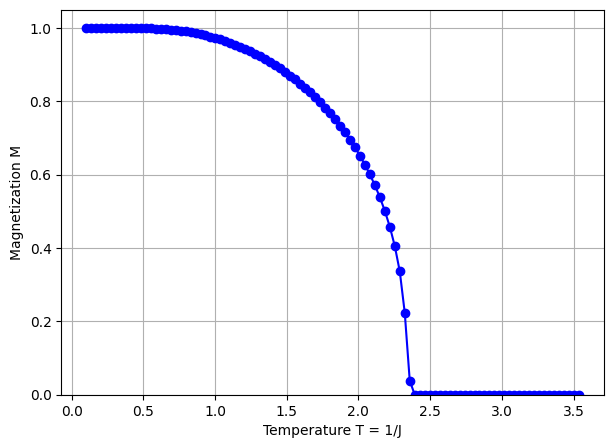

In [51]:
# Parameters
a = 1.5
Jc = find_Jc(
    a=a,
    Jlow=1e-2, Jhigh=1e2,
    max_steps=8, max_dist_final=6,
    tol=1e-6, growth_threshold=1e4, decay_threshold=1e-4
)

print(f"Jc = {Jc}")
T_values = np.linspace(0.1, 1.5/Jc, 100)
J_values = 1.0 / T_values

M_values = [magnetization(J0, a, Jc,
                          max_dist_final=6,
                          max_steps=12,
                          eps=1e-8) for J0 in J_values]

plt.figure(figsize=(7, 5))
plt.plot(T_values, M_values, 'b-o')
plt.xlabel("Temperature T = 1/J")
plt.ylabel("Magnetization M")
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

## Multiple a's

Processing a = 0.0
Processing a = 0.2
Processing a = 0.4
Processing a = 0.6


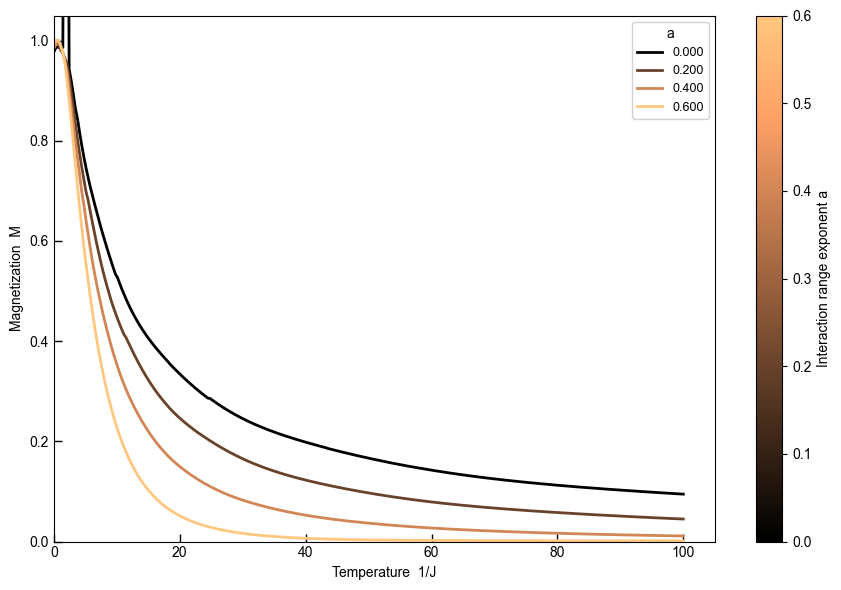

In [118]:
from matplotlib import cm

a_values = np.array([0.0 , 0.2, 0.4, 0.6])
data_by_a = []

for a in a_values:
    print(f"Processing a = {a}")

    if a < 0.8:
        Jc = 1e-10
        T_arr = np.linspace(0.10, 100, 300)
        J_arr = 1.0 / T_arr
    else:
        Jc = find_Jc(
            a=a,
            Jlow=1e-2, Jhigh=1e2,
            max_steps=10,
            max_dist_final=6,
            tol=1e-6,
            growth_threshold=1e4,
            decay_threshold=1e-4
        )
        T_arr = np.linspace(0.10, 1.1 / Jc, 100)
        J_arr = 1.0 / T_arr


    M_arr = []
    for J0 in J_arr:
        T = 1/J0
        if T < 0.8: max_k = 8
        else: max_k = 10
        M_arr.append(magnetization(J0, a, Jc, max_dist_final=6, max_steps=max_k, eps=1e-8))    
    M_arr = np.array(M_arr)

    data_by_a.append(list(zip(T_arr, M_arr)))

# Plot
fig, ax = plt.subplots(figsize=(9, 6))
cmap = cm.copper
norm = plt.Normalize(a_values.min(), a_values.max())

for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    ax.plot(T_arr, M_arr, label=f"{a:.3f}", color=cmap(norm(a)), linewidth=2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='Interaction range exponent a')
ax.set_xlabel('Temperature  1/J')
ax.set_ylabel('Magnetization  M')
ax.set_xlim(0, None)
ax.set_ylim(0, 1.05)
ax.legend(title='a', loc='upper right', fontsize=9, framealpha=.9)
ax.tick_params(axis='both', which='major', direction='in', width=1, length=6)
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import cm

a_values = np.array([0.0 , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 1.9, 2.0 ])
data_by_a = []

for a in a_values:
    print(f"Processing a = {a}")

    Jc = find_Jc(
        a=a,
        Jlow=1e-5, Jhigh=1e2,
        max_steps=10,
        max_dist_final=6,
        tol=1e-6,
        growth_threshold=1e4,
        decay_threshold=1e-4
    )

    T_arr = np.linspace(0.10, 1.5 / Jc, 300)
    J_arr = 1.0 / T_arr

    M_arr = np.array([
        magnetization(J0, a, Jc, max_dist_final=6, max_steps=10, eps=1e-8)
        for J0 in J_arr
    ])

    data_by_a.append(list(zip(T_arr, M_arr)))

# Plot
fig, ax = plt.subplots(figsize=(9, 6))
cmap = cm.copper
norm = plt.Normalize(a_values.min(), a_values.max())

for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    ax.plot(T_arr, M_arr, label=f"{a:.3f}", color=cmap(norm(a)), linewidth=2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, ax=ax, label='Interaction range exponent a')
ax.set_xlabel('Temperature  1/J')
ax.set_ylabel('Magnetization  M')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1.05)
ax.legend(title='a', loc='upper right', fontsize=9, framealpha=.9)
ax.tick_params(axis='both', which='major', direction='in', width=1, length=6)
plt.tight_layout()
plt.show()

## Save data

In [86]:
# Save data for each a to its own file
for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    out = np.column_stack((T_arr, M_arr))

    filename = f"../data/magnetization/magnetization_a_{a:.3f}.txt"
    np.savetxt(
        filename, out,
        header="T\tM",
        fmt="%.12e",
        comments=""
    )
    print("Saved:", filename)

Saved: ../data/magnetization/magnetization_a_0.000.txt
Saved: ../data/magnetization/magnetization_a_0.200.txt
Saved: ../data/magnetization/magnetization_a_0.400.txt
Saved: ../data/magnetization/magnetization_a_0.600.txt
Saved: ../data/magnetization/magnetization_a_0.800.txt
Saved: ../data/magnetization/magnetization_a_1.000.txt
Saved: ../data/magnetization/magnetization_a_1.200.txt
Saved: ../data/magnetization/magnetization_a_1.400.txt
Saved: ../data/magnetization/magnetization_a_1.600.txt
Saved: ../data/magnetization/magnetization_a_1.800.txt
Saved: ../data/magnetization/magnetization_a_1.900.txt
Saved: ../data/magnetization/magnetization_a_2.000.txt


## Load data

In [10]:
# Load data for each a from its own file
import numpy as np

# a-values used originally
a_values = np.array([0.0 , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 1.9, 2.0])

data_by_a = []

for a in a_values:
    filename = f"../data/magnetization/magnetization_a_{a:.3f}.txt"
    print("Loading:", filename)

    # If file has a header "T M", skiprows=1 handles it.
    arr = np.loadtxt(filename, skiprows=1)

    T_arr = arr[:, 0]
    M_arr = arr[:, 1]

    data_by_a.append(list(zip(T_arr, M_arr)))

Loading: ../data/magnetization/magnetization_a_0.000.txt
Loading: ../data/magnetization/magnetization_a_0.200.txt
Loading: ../data/magnetization/magnetization_a_0.400.txt
Loading: ../data/magnetization/magnetization_a_0.600.txt
Loading: ../data/magnetization/magnetization_a_0.800.txt
Loading: ../data/magnetization/magnetization_a_1.000.txt
Loading: ../data/magnetization/magnetization_a_1.200.txt
Loading: ../data/magnetization/magnetization_a_1.400.txt
Loading: ../data/magnetization/magnetization_a_1.600.txt
Loading: ../data/magnetization/magnetization_a_1.800.txt
Loading: ../data/magnetization/magnetization_a_1.900.txt
Loading: ../data/magnetization/magnetization_a_2.000.txt


/var/folders/p_/j__hv0j95yv8xknt5_nvt4pw0000gn/T/ipykernel_69814/1581770836.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


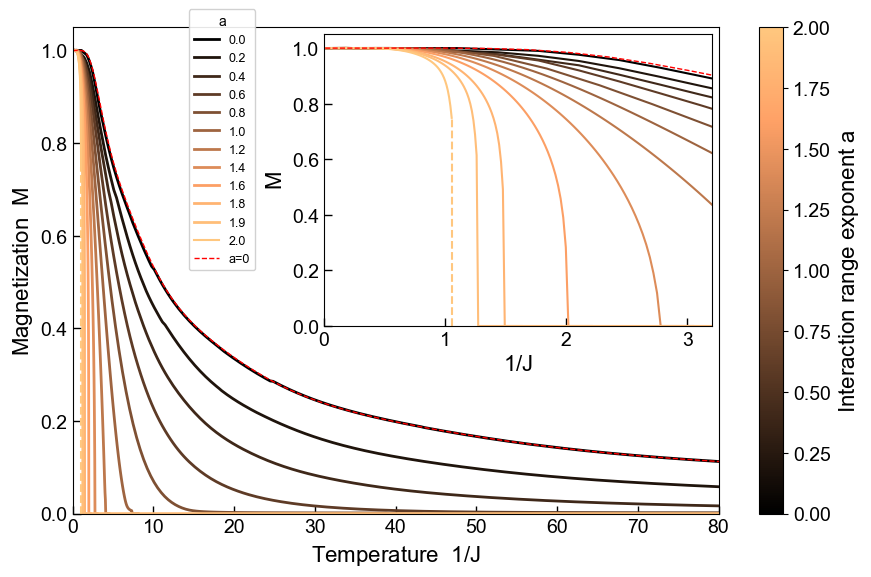

In [16]:
from matplotlib import cm

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default': 'regular'})

fig, ax = plt.subplots(figsize=(9, 6))
cmap = cm.copper
norm = plt.Normalize(a_values.min(), a_values.max())

# Main plot
for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    if a != max(a_values):
        ax.plot(T_arr, M_arr, label=f"{a:.1f}", color=cmap(norm(a)), linewidth=2)
    else:
        i = np.where(T_arr==1.054473426129e+00)[0][0]
        ax.plot(T_arr[:i+1], M_arr[:i+1], marker='', label=f'{a:.1f}', color=cmap(norm(a)), linewidth=1.5)
        ax.plot([T_arr[i], T_arr[i]], [0, M_arr[i]], linestyle='--', color=cmap(norm(a)), linewidth=1.5)


# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Interaction range exponent $a$', fontsize=16)
cbar.ax.tick_params(labelsize=14) 

ax.set_xlabel('Temperature  $1/J$', fontsize=16)
ax.set_ylabel('Magnetization  $M$', fontsize=16)
ax.set_xlim(0, 80)
ax.set_ylim(0, 1.05)
ax.legend(title='a', loc=(0.18, 0.5), fontsize=9, framealpha=.9)
ax.tick_params(axis='both', which='major', direction='in', labelsize=14, width=1, length=6)

# --- Inset axis (upper right) ---
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

inset = inset_axes(ax, width="60%", height="60%", loc="upper right")

# Plot into inset
for a, tuples_a in zip(a_values, data_by_a):
    T_arr = np.array([x[0] for x in tuples_a])
    M_arr = np.array([x[1] for x in tuples_a])
    if a != max(a_values):
        inset.plot(T_arr, M_arr, color=cmap(norm(a)), linewidth=1.5)
    else:
        #i = np.where(T_arr==1.054473426129e+00)[0][0]
        inset.plot(T_arr[:i+1], M_arr[:i+1], marker='', label=f'{a:.2f}', color=cmap(norm(a)), linewidth=1.5)
        inset.plot([T_arr[i], T_arr[i]], [0, M_arr[i]], linestyle='--', color=cmap(norm(a)), linewidth=1.5)

# Set x-axis limits for zoom
inset.set_xlabel('$1/J$', fontsize=16)
inset.set_ylabel('$M$', fontsize=16)
inset.set_xlim(0, 3.2)
inset.set_ylim(0, 1.05)
inset.tick_params(axis='both', which='major', direction='in', labelsize=14, width=1, length=6)

plt.tight_layout()
plt.savefig("magnetization.png")
plt.show()

# Critical exponents

In [ ]:
result = compute_exponents_over_a(
    a_min=1, a_max=2.0,
    num_points=10,
    D_init=2000, N_matrix=1000,
    d_dim=1.0, b=3.0
)

a = result["a"]
exps = [
    ("yT",     result["yT"]),
    ("yH",     result["yH"]),
    ("β",      result["beta"]),
    ("δ",      result["delta"]),
    ("η",      result["eta"]),
    ("ν",      result["nu"]),
    ("α",      result["alpha"]),
    ("γ",      result["gamma"]),
]

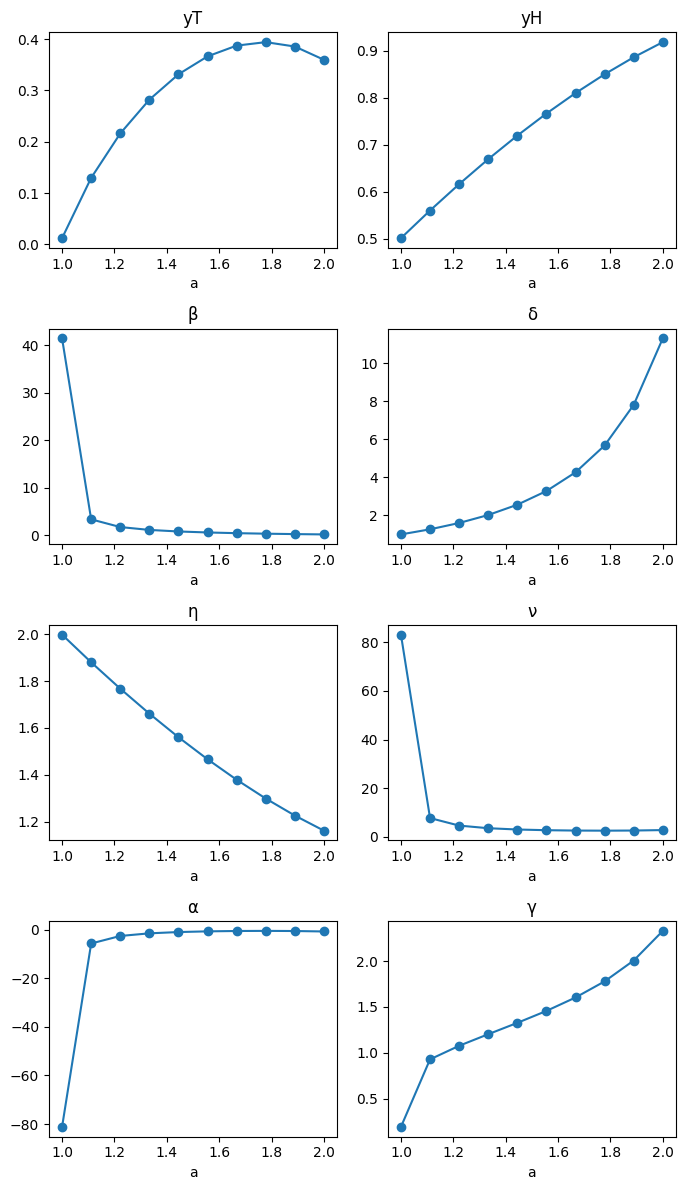

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(7, 12))
axes = axes.flatten()

for i, (name, vals) in enumerate(exps):
    ax = axes[i]
    ax.plot(a, vals, marker="o")
    ax.set_title(name)
    ax.set_xlabel("a")
    ax.grid(False)
plt.tight_layout()
#plt.savefig("../figures/exponents_new.png")
plt.show()